In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('mental_health_digital_behavior_data.csv')

In [3]:
data.head()

,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,focus_score,mood_score,anxiety_level,digital_wellbeing_score
0,389.8,53,5.9,89,133.2,6.8,8.9,10.0,44.8
1,351.7,52,7.2,79,109.5,5.5,9.4,10.0,43.6
2,398.9,39,8.0,108,84.7,6.7,9.4,9.4,52.6
3,451.4,44,6.5,78,88.9,6.0,9.4,5.1,58.4
4,346.0,43,6.9,35,78.8,8.2,9.4,8.0,59.7


In [4]:
data['digital_wellbeing_score'].max()

80.8

In [5]:
data['digital_wellbeing_score'].min()

34.6

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   daily_screen_time_min    500 non-null    float64
 1   num_app_switches         500 non-null    int64  
 2   sleep_hours              500 non-null    float64
 3   notification_count       500 non-null    int64  
 4   social_media_time_min    500 non-null    float64
 5   focus_score              500 non-null    float64
 6   mood_score               500 non-null    float64
 7   anxiety_level            500 non-null    float64
 8   digital_wellbeing_score  500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [7]:
data.describe()

,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,focus_score,mood_score,anxiety_level,digital_wellbeing_score
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,360.437800,49.840000,6.557400,79.51200,121.771800,6.998000,8.988600,8.451800,52.310400
std,58.782476,7.340993,1.192043,23.97974,43.809443,0.618742,0.519104,2.134425,7.943186
min,180.000000,30.000000,3.000000,20.00000,30.000000,5.500000,7.400000,1.000000,34.600000
25%,317.975000,44.000000,5.800000,63.00000,91.875000,6.600000,8.600000,7.275000,46.800000
50%,360.800000,50.000000,6.500000,80.00000,119.550000,7.000000,9.000000,9.700000,51.000000
75%,398.175000,55.000000,7.325000,96.00000,149.500000,7.400000,9.300000,10.000000,56.600000
max,591.200000,72.000000,10.000000,158.00000,296.700000,8.600000,10.000000,10.000000,80.800000


In [8]:
data.isnull().sum()

daily_screen_time_min      0
num_app_switches           0
sleep_hours                0
notification_count         0
social_media_time_min      0
focus_score                0
mood_score                 0
anxiety_level              0
digital_wellbeing_score    0
dtype: int64

<Axes: >

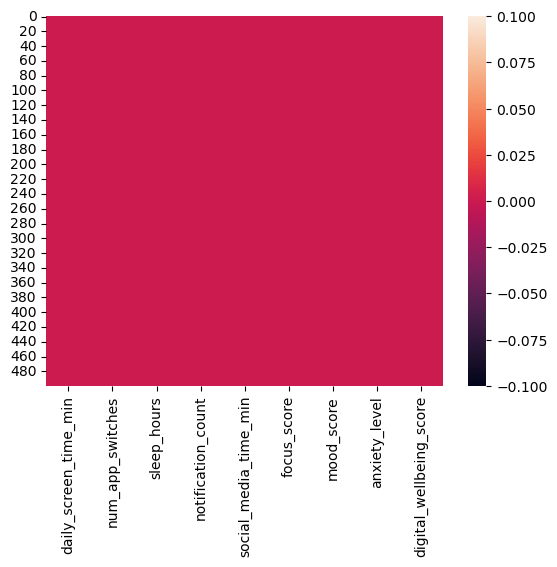

In [9]:
sns.heatmap(data.isnull())

In [10]:
#preprocess Data
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [11]:
bins = (33, 60, 90)
group_names =['unhealthy', 'healthy']
data['digital_wellbeing_score'] = pd.cut(data['digital_wellbeing_score'], bins = bins, labels = group_names)
data['digital_wellbeing_score'].unique()

['unhealthy', 'healthy']
Categories (2, object): ['unhealthy' < 'healthy']

In [24]:
label_digital_wellbeing_score = LabelEncoder()

In [26]:
data['digital_wellbeing_score'] = label_digital_wellbeing_score.fit_transform(data['digital_wellbeing_score'])

In [28]:
data.head()

,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,focus_score,mood_score,anxiety_level,digital_wellbeing_score
0,389.8,53,5.9,89,133.2,6.8,8.9,10.0,1
1,351.7,52,7.2,79,109.5,5.5,9.4,10.0,1
2,398.9,39,8.0,108,84.7,6.7,9.4,9.4,1
3,451.4,44,6.5,78,88.9,6.0,9.4,5.1,1
4,346.0,43,6.9,35,78.8,8.2,9.4,8.0,1


In [30]:
data['digital_wellbeing_score'].value_counts()

digital_wellbeing_score
1    412
0     88
Name: count, dtype: int64

<Axes: xlabel='digital_wellbeing_score'>

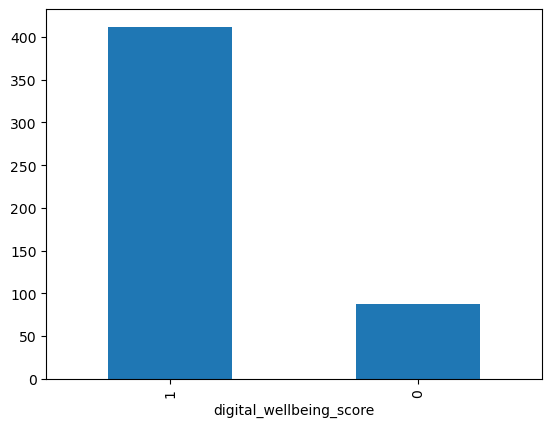

In [36]:
data['digital_wellbeing_score'].value_counts().plot(kind ='bar')

In [42]:
#seperate the Data
x = data.drop(columns = ['digital_wellbeing_score'])
y = data['digital_wellbeing_score']

In [44]:
#scale the x data
sc = StandardScaler()

In [50]:
x_scaled = sc.fit_transform(x)

In [52]:
x_scaled

array([[ 0.50000627,  0.43089057, -0.55204236, ..., -0.32032461,
        -0.17084964,  0.72607416],
       [-0.14879521,  0.2945328 ,  0.53961427, ..., -2.42346602,
         0.79331311,  0.72607416],
       [ 0.65496935, -1.4781183 ,  1.21140297, ..., -0.48210472,
         0.79331311,  0.44468642],
       ...,
       [-0.20158483, -1.06904497, -0.38409519, ...,  1.29747647,
         1.9503084 ,  0.72607416],
       [-0.90147305, -2.29626496,  0.53961427, ...,  1.62103668,
         0.60048056, -2.08780321],
       [-1.42085481, -1.20540274, -0.38409519, ..., -0.32032461,
        -0.36368219, -1.00915022]])

In [54]:
#split the data
from sklearn.model_selection import train_test_split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)

In [58]:
#Train a model
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression

In [60]:
rcf = RandomForestClassifier()
rcf.fit(x_train, y_train)

RandomForestClassifier()

In [62]:
rcf_pred = rcf.predict(x_test)
rcf_pred[:20]

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [66]:
#check accuracy
from sklearn.metrics import classification_report, accuracy_score

In [72]:
rcf_accuracy = accuracy_score(y_test, rcf_pred)
print(f"Accuracy: {rcf_accuracy: .2f}")

Accuracy:  0.91


In [78]:
rcf_classfication_report = classification_report(y_test, rcf_pred)
rcf_classfication_report

'              precision    recall  f1-score   support\n\n           0       0.69      0.64      0.67        14\n           1       0.94      0.95      0.95        86\n\n    accuracy                           0.91       100\n   macro avg       0.82      0.80      0.81       100\nweighted avg       0.91      0.91      0.91       100\n'

In [86]:
neural = MLPClassifier(hidden_layer_sizes = (12, 12, 12), max_iter =900)
neural.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(12, 12, 12), max_iter=900)

In [92]:
neural_pred = neural.predict(x_test)
neural_pred[:20]

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [94]:
#check accuracy
neural_accuracy = accuracy_score(y_test, neural_pred)
print(f"Accuracy: {neural_accuracy: .2f}")

Accuracy:  0.97


In [96]:
neural_classfication_report = classification_report(y_test, neural_pred)
neural_classfication_report

'              precision    recall  f1-score   support\n\n           0       0.92      0.86      0.89        14\n           1       0.98      0.99      0.98        86\n\n    accuracy                           0.97       100\n   macro avg       0.95      0.92      0.94       100\nweighted avg       0.97      0.97      0.97       100\n'

In [147]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [151]:
lr_pred = lr.predict(x_test)
lr_pred[:20]

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [153]:
#check accuracy
lr_accuracy = accuracy_score(y_test, lr_pred)
print(f"Accuracy: {lr_accuracy: .2f}")

Accuracy:  0.99


In [155]:
lr_classfication_report = classification_report(y_test, lr_pred)
lr_classfication_report

'              precision    recall  f1-score   support\n\n           0       1.00      0.93      0.96        14\n           1       0.99      1.00      0.99        86\n\n    accuracy                           0.99       100\n   macro avg       0.99      0.96      0.98       100\nweighted avg       0.99      0.99      0.99       100\n'